In [1]:
pip install flair torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.

In [2]:
%pip install datasets
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [3]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset,load_metric

In [4]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [5]:
a=dataset['train']['tokens']
X_train = [' '.join(sublist) for sublist in a]

print(X_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [6]:
b=dataset['test']['tokens']
X_test = [' '.join(sublist) for sublist in b]

print(X_test)

['Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit .', 'Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V. Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] .', 'We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] .', 'Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less

In [7]:
c=dataset['validation']['tokens']
X_validation = [' '.join(sublist) for sublist in c]

print(X_validation)

['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal , |Quad = quadriplegia , Di = Diplegia , Hemi = hemiplegia .', 'Electro - oculography ( EOG ) ( RetiPort32 , Roland Consult , Wiesbaden , Germany ) was performed in all patients according to the guidelines of the International Society for Clinical Electrophysiology of Vision ( ISCEV).[12 ] Arden ratios below 1.8 were rated as pathologic .', 'Soluble N - ethylmaleimide - sensitive factor attachment protein receptor ( SNARE ) proteins , including target- ( t- ) membrane SNAREs ( Syntaxins [ Syn ] ) and synaptosomal - associated proteins of 25 kDa ( SNAP25 ) and vesicle - associated membrane proteins ( VAMPs ) , are the fundamental components of the exocytotic machinery required for the docking and fusion of secretory granules ( SGs ) with the plasma membrane ( PM ) , which have been well studied in neurons [ 1 , 2 ] 

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

# Assuming mlb is your MultiLabelBinarizer instance
print("Classes encoded by MultiLabelBinarizer:", mlb.classes_)
print("Frequency of each class in training set:", y_train.sum(axis=0))
print("Frequency of each class in test set:", y_test.sum(axis=0))
print("Frequency of each class in test set:", y_vals.sum(axis=0))

print(y_train.shape)
print(y_test.shape)
print(y_vals.shape)

Classes encoded by MultiLabelBinarizer: ['B-AC' 'B-LF' 'B-O' 'I-LF']
Frequency of each class in training set: [ 958  856 1072  802]
Frequency of each class in test set: [131 113 153 100]
Frequency of each class in test set: [116 101 126  90]
(1072, 4)
(153, 4)
(126, 4)


In [9]:

bert_embeddings = TransformerWordEmbeddings('bert-base-uncased')

# Initialize Flair embeddings (forward and backward)
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Stack embeddings
stacked_embeddings = StackedEmbeddings([
    bert_embeddings,
    flair_forward,
    flair_backward
])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

2024-04-26 00:32:15,026 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-forward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmp7l3pcoth


100%|██████████| 18.8M/18.8M [00:03<00:00, 6.34MB/s]

2024-04-26 00:32:18,959 copying /tmp/tmp7l3pcoth to cache at /root/.flair/embeddings/lm-news-english-forward-1024-v0.2rc.pt
2024-04-26 00:32:18,975 removing temp file /tmp/tmp7l3pcoth


2024-04-26 00:32:19,986 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-backward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpk4zy0sdm


100%|██████████| 18.8M/18.8M [00:03<00:00, 6.32MB/s]

2024-04-26 00:32:23,929 copying /tmp/tmpk4zy0sdm to cache at /root/.flair/embeddings/lm-news-english-backward-1024-v0.2rc.pt
2024-04-26 00:32:23,945 removing temp file /tmp/tmpk4zy0sdm


In [10]:
import torch

In [11]:
def embed_documents(documents):
    embedded_docs = []
    for doc in documents:
        sentence = Sentence(doc)
        stacked_embeddings.embed(sentence)
        # Collecting embedded vectors
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return embedded_docs


train_embedded = embed_documents(X_train)
test_embedded = embed_documents(X_test)
val_embedded=embed_documents(X_validation)

# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #   sigmoid  # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [12]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim,activation = "sigmoid"):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out


In [13]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib as plt


model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_),activation = "sigmoid")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

training_losses = []
validation_losses = []
model.train()

for epoch in range(3):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')




Epoch 1: Training Loss = 1.5680779078427483, Validation Loss = 0.362225666642189
Epoch 2: Training Loss = 0.3031011372804642, Validation Loss = 0.3205922618508339
Epoch 3: Training Loss = 0.24034260607817592, Validation Loss = 0.30015070363879204


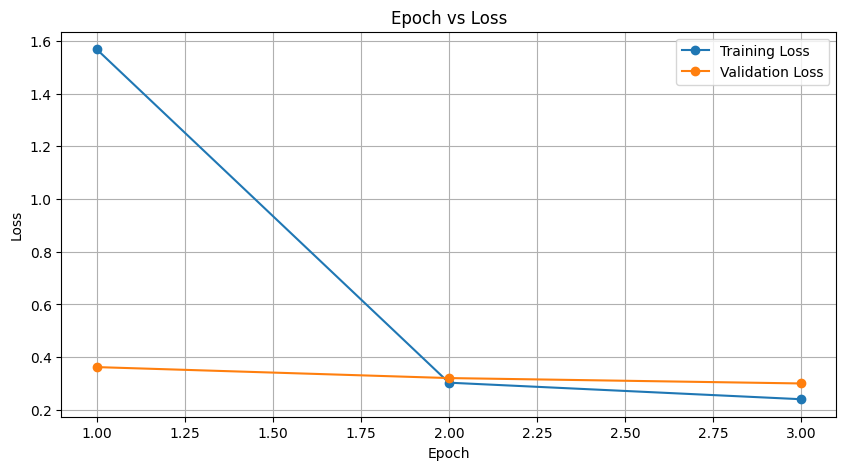

In [16]:
import matplotlib.pyplot as plt
# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 4), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.7059
Precision: 0.8741
Recall: 0.9884
F1 Score: 0.9259
              precision    recall  f1-score   support

        B-AC       0.89      1.00      0.94       131
        B-LF       0.84      0.97      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.98      0.86       100

   micro avg       0.88      0.99      0.93       497
   macro avg       0.87      0.99      0.93       497
weighted avg       0.89      0.99      0.93       497
 samples avg       0.87      0.99      0.91       497



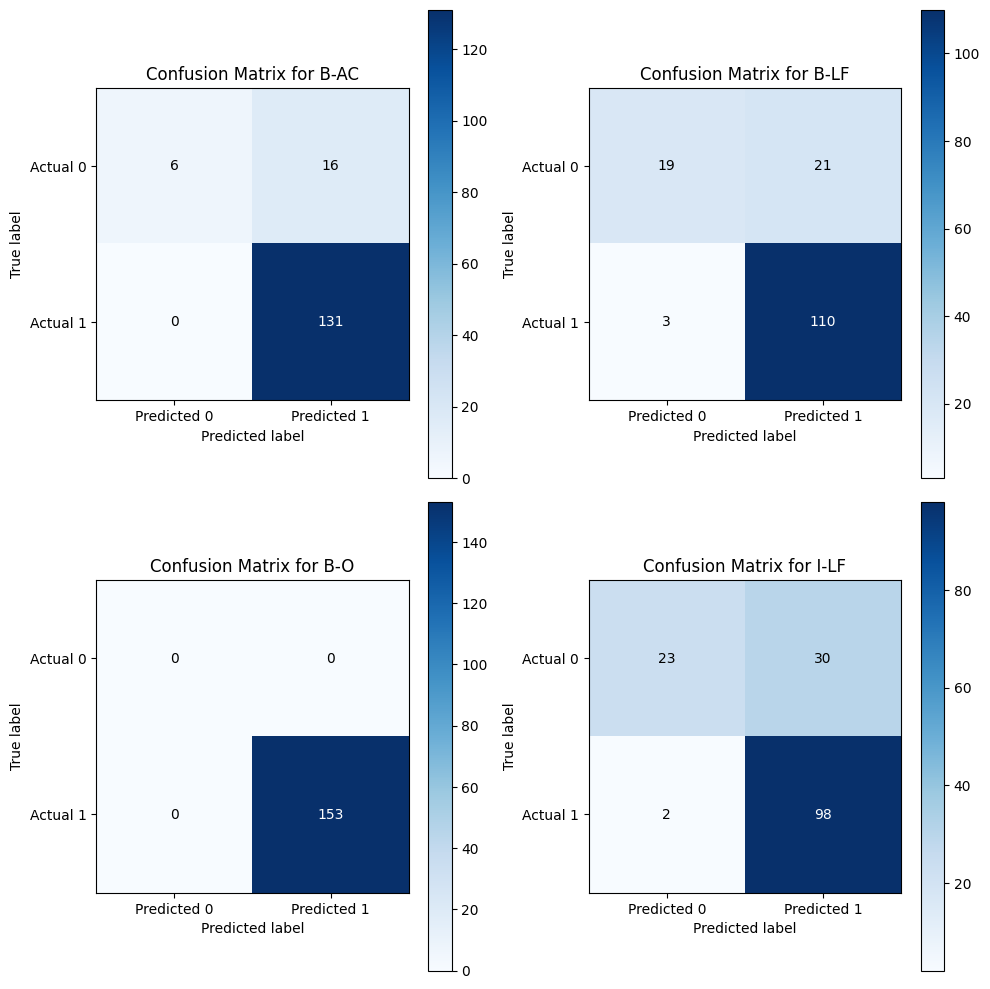

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")

Test Data - Accuracy: 0.7059, Precision: 0.8741, Recall: 0.9884, F1 Score: 0.9259
              precision    recall  f1-score   support

        B-AC       0.89      1.00      0.94       131
        B-LF       0.84      0.97      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.98      0.86       100

   micro avg       0.88      0.99      0.93       497
   macro avg       0.87      0.99      0.93       497
weighted avg       0.89      0.99      0.93       497
 samples avg       0.87      0.99      0.91       497

Validation Data - Accuracy: 0.7063, Precision: 0.8820, Recall: 0.9842, F1 Score: 0.9288
              precision    recall  f1-score   support

        B-AC       0.92      1.00      0.96       116
        B-LF       0.83      0.97      0.89       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.78      0.97      0.86        90

   micro avg       0.89      0.99      0.93       433
   macro avg   

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #      relu    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim,activation = "relu"):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out

Epoch 1: Training Loss = 1.6510360442540224, Validation Loss = 0.3582608848810196
Epoch 2: Training Loss = 0.3054590873858508, Validation Loss = 0.32150402665138245
Epoch 3: Training Loss = 0.2480425444595954, Validation Loss = 0.30572709441185


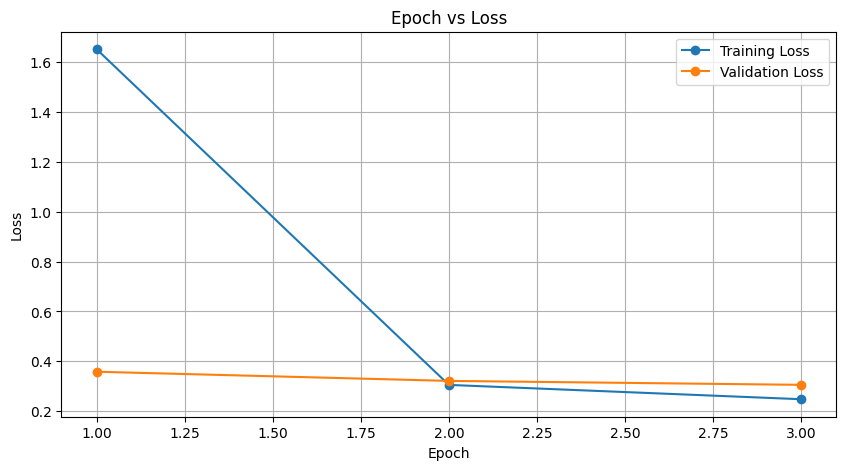

In [ ]:


from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_),activation = "relu")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

training_losses = []
validation_losses = []
model.train()

for epoch in range(3):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 4), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.7124
Precision: 0.8914
Recall: 0.9654
F1 Score: 0.9260
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.95       131
        B-LF       0.85      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.79      0.92      0.85       100

   micro avg       0.90      0.97      0.93       497
   macro avg       0.89      0.97      0.93       497
weighted avg       0.90      0.97      0.93       497
 samples avg       0.90      0.97      0.91       497



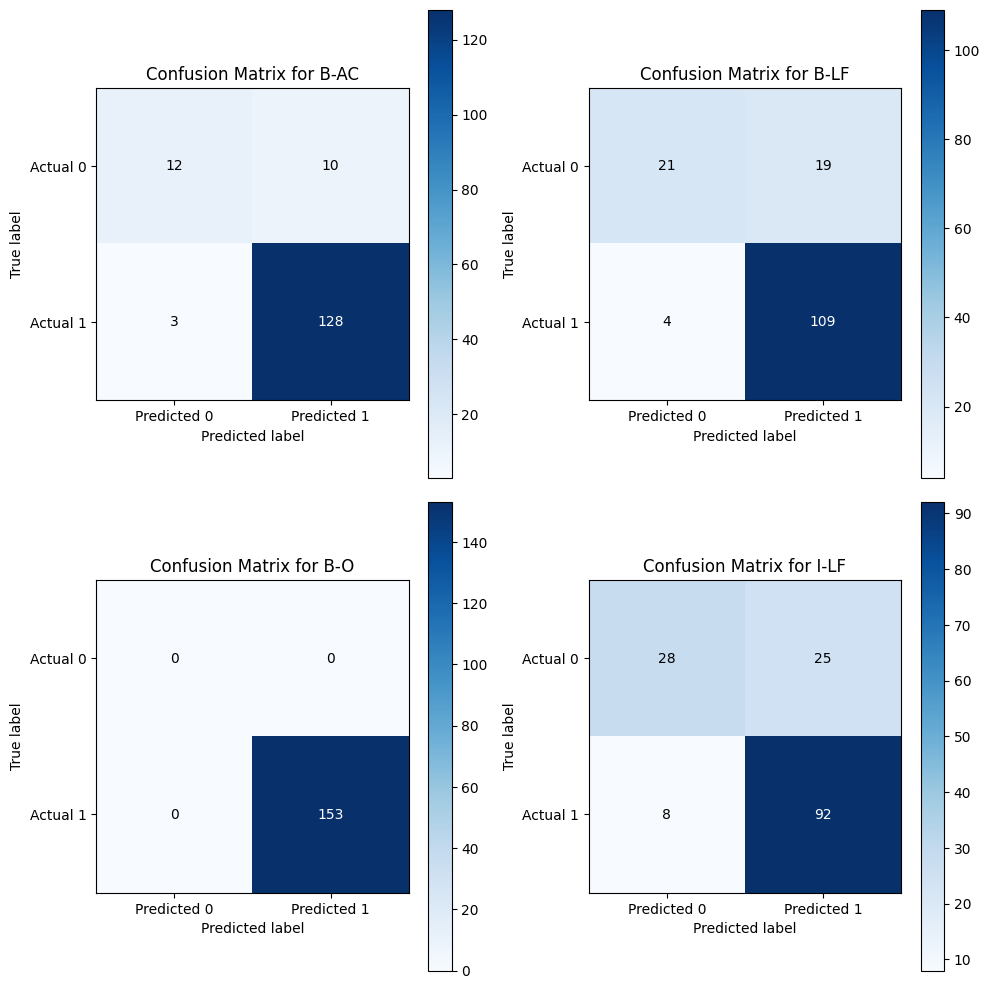

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")



Test Data - Accuracy: 0.7124, Precision: 0.8914, Recall: 0.9654, F1 Score: 0.9260
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.95       131
        B-LF       0.85      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.79      0.92      0.85       100

   micro avg       0.90      0.97      0.93       497
   macro avg       0.89      0.97      0.93       497
weighted avg       0.90      0.97      0.93       497
 samples avg       0.90      0.97      0.91       497

Validation Data - Accuracy: 0.6984, Precision: 0.8963, Recall: 0.9413, F1 Score: 0.9178
              precision    recall  f1-score   support

        B-AC       0.94      0.97      0.95       116
        B-LF       0.86      0.91      0.88       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.78      0.89      0.83        90

   micro avg       0.90      0.95      0.92       433
   macro avg   

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # tanh  # # # # # # # # # # # # # # # # # # # # # # # # # # # # #


In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim,activation = "tanh"):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out

Epoch 1: Training Loss = 1.6600903886206009, Validation Loss = 0.36158373951911926
Epoch 2: Training Loss = 0.3132770631243201, Validation Loss = 0.3325589522719383
Epoch 3: Training Loss = 0.2658332551226896, Validation Loss = 0.3099106326699257


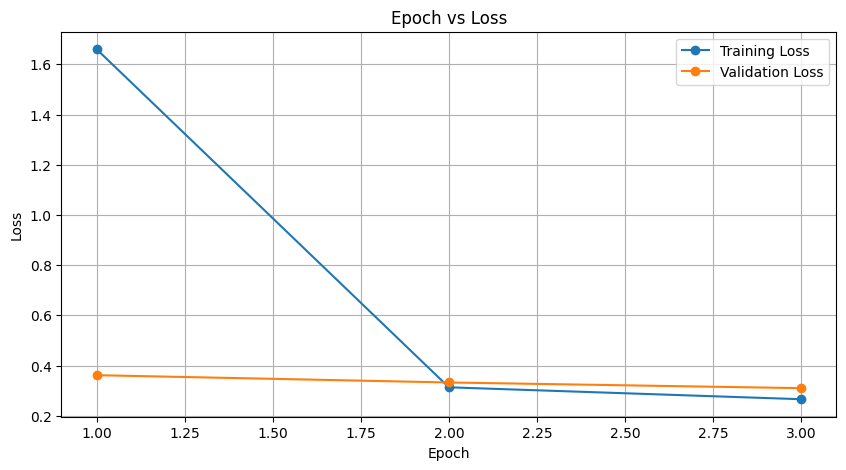

In [ ]:


from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_),activation = "tanh")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

training_losses = []
validation_losses = []
model.train()

for epoch in range(3):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 4), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.6732
Precision: 0.8733
Recall: 0.9667
F1 Score: 0.9165
              precision    recall  f1-score   support

        B-AC       0.90      0.99      0.95       131
        B-LF       0.84      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.75      0.91      0.82       100

   micro avg       0.88      0.97      0.92       497
   macro avg       0.87      0.97      0.92       497
weighted avg       0.89      0.97      0.93       497
 samples avg       0.88      0.97      0.90       497



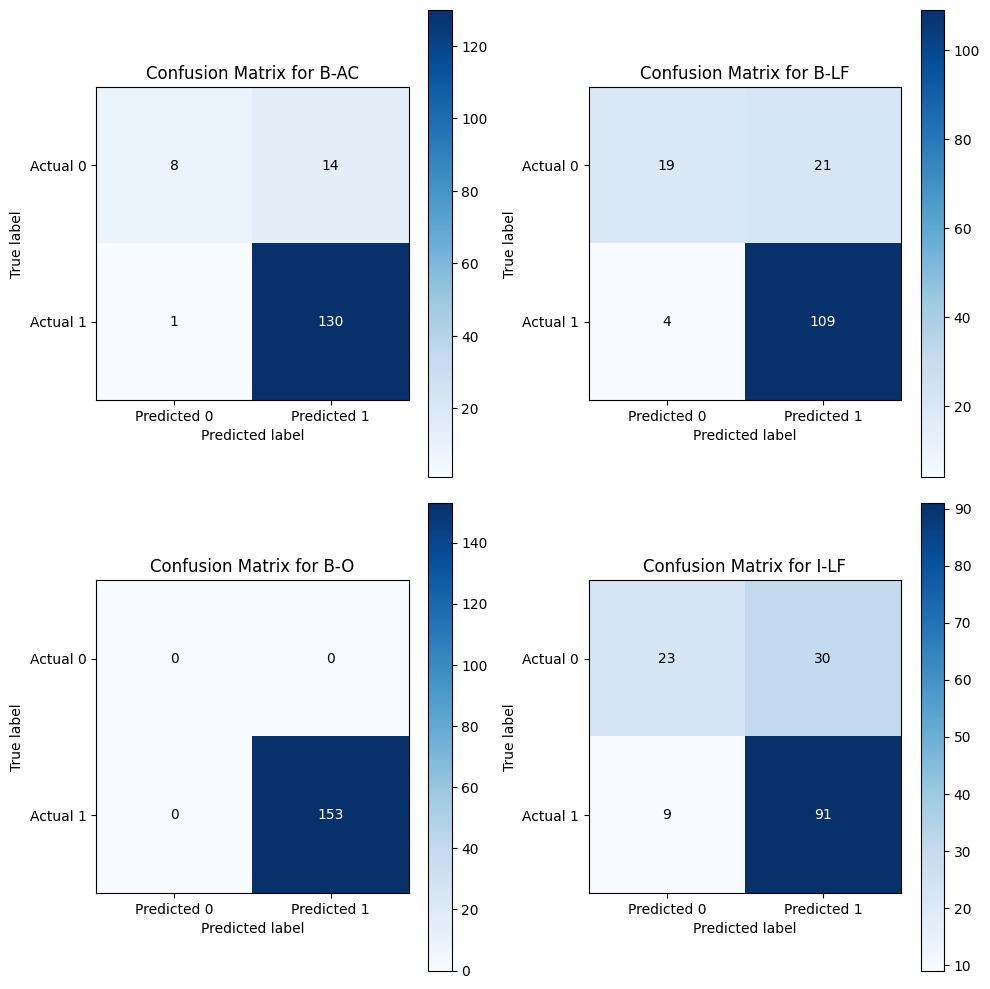

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")


Test Data - Accuracy: 0.6732, Precision: 0.8733, Recall: 0.9667, F1 Score: 0.9165
              precision    recall  f1-score   support

        B-AC       0.90      0.99      0.95       131
        B-LF       0.84      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.75      0.91      0.82       100

   micro avg       0.88      0.97      0.92       497
   macro avg       0.87      0.97      0.92       497
weighted avg       0.89      0.97      0.93       497
 samples avg       0.88      0.97      0.90       497

Validation Data - Accuracy: 0.6825, Precision: 0.8914, Recall: 0.9484, F1 Score: 0.9184
              precision    recall  f1-score   support

        B-AC       0.93      0.97      0.95       116
        B-LF       0.86      0.93      0.90       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.77      0.89      0.82        90

   micro avg       0.90      0.95      0.92       433
   macro avg   